In [1]:
pip install umap

  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3565 sha256=65fc5094e1620ae9e696ea5e96c93b4903b60da63416c583f9884fc2d56741be
  Stored in directory: /root/.cache/pip/wheels/65/55/85/945cfb3d67373767e4dc3e9629300a926edde52633df4f0efe
Successfully built umap


In [2]:
import cv2
import shutil
import glob
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Make images to a common size (32x32), (64x64)

In [40]:
pos = [(32,32),(224,224)]

In [9]:
def preprocess(im):
    norm_image = cv2.normalize(im, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    return norm_image

In [41]:
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import resnet50
from tensorflow.keras.applications import xception
from tensorflow import keras
import pickle
import umap
import glob
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import cv2 # installed with `pip install opencv-contrib-python`
    
'''
RESNET50
'''
    
def img2vec_resnet50(imagedir):
    
    image_paths = glob.glob(str(imagedir) + '/*.jpg')
    _IMAGE_NET_TARGET_SIZE = (224, 224)
    model = resnet50.ResNet50(weights='imagenet')
    layer_name = 'avg_pool'
    intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
    image_vectors = {}

    for c,image_path in enumerate(image_paths):
        print("\r" + str(c+1) + "/" + str(len(image_paths)), end="")
        img = image.load_img(image_path, target_size=_IMAGE_NET_TARGET_SIZE)
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = resnet50.preprocess_input(x)
        intermediate_output = intermediate_layer_model.predict(x)
        vector = intermediate_output[0]
        image_vectors[image_path] = vector
    
    embeddings = np.stack(list(image_vectors.values()))
    return embeddings    
'''
XCEPTION
'''
    
def img2vec_xception(imagedir):
    
    image_paths = glob.glob(str(imagedir) + '/*.jpg')
    _IMAGE_NET_TARGET_SIZE = (299, 299)
    model = xception.Xception(weights='imagenet')
    layer_name = 'avg_pool'
    intermediate_layer_model = Model(inputs=model.input,outputs=model.get_layer(layer_name).output)

    image_vectors = {}
    global image_path
    for c,image_path in enumerate(image_paths):
        print("\r" + str(c+1) + "/" + str(len(image_paths)), end="")
        img = image.load_img(image_path, target_size=_IMAGE_NET_TARGET_SIZE)
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = xception.preprocess_input(x)
        intermediate_output = intermediate_layer_model.predict(x)
        vector = intermediate_output[0]
        image_vectors[image_path] = vector
    embeddings = np.stack(list(image_vectors.values()))
    return embeddings 

In [ ]:
def preprocess(im):
    norm_image = cv2.normalize(im, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    return norm_image

In [6]:
loc = "/content/drive/MyDrive/CSS_Project/Data/seal"

In [30]:
# shutil.rmtree('/content/NEW')

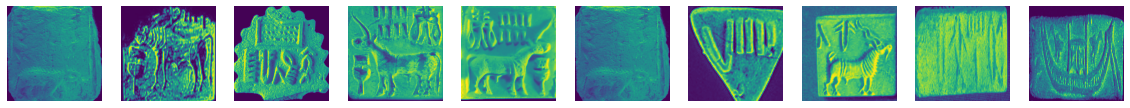

In [55]:
data = []
w=1
for i in glob.glob(loc+"/*.jpg"):
    im = cv2.imread(i,0)
    im = cv2.resize(im,pos[1])
    path="/content/NEW/"+"pic"+str(w)+".jpg"
    w+=1
    cv2.imwrite(str(path),im)
    data.append(im)


fig = plt.figure(figsize=[20,20])

for i in range(10):
    j = random.randint(0,50)
    im = data[j]
    ax = fig.add_subplot(1,10,i+1)
    plt.axis('off')
    plt.imshow(im)
plt.show()

**64x64 tends to work better 32x32 in visualization
Make clusters of image using various technique**

**Perform Resnet**

In [78]:
embeddings = img2vec_resnet50('/content/NEW')
print(embeddings.shape)

125/125(125, 2048)


**Cluster the embeddings here**

In [79]:
kmeans = KMeans(n_clusters=2, random_state=42).fit(embeddings)

In [80]:
score = silhouette_score(embeddings, kmeans.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.114


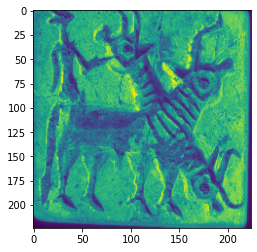

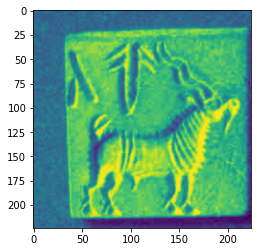

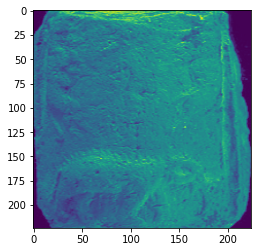

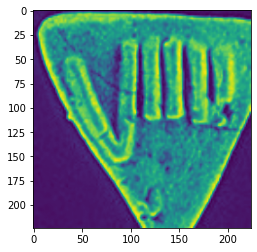

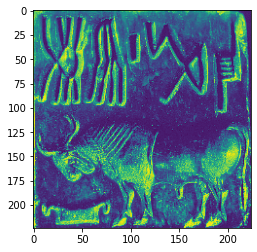

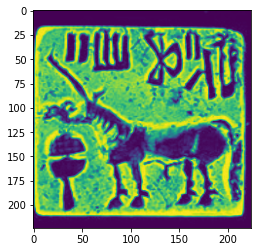

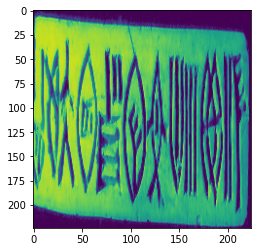

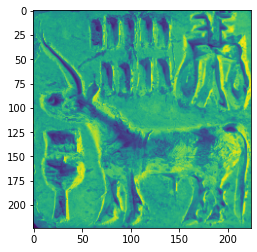

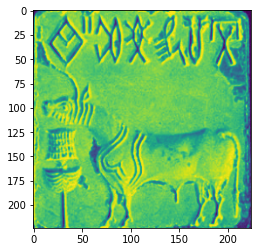

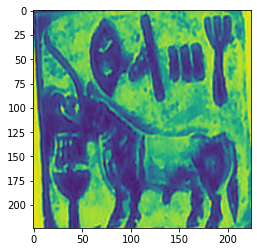

In [81]:
plt.figure(figsize=(10,10)) # specifying the overall grid size
labels = kmeans.labels_
count = 0
for i in range(len(data)):
    if(labels[i]==1):
        plt.subplot(5,5,i+1)    # the number of images in the grid is 5*5 (25)
        plt.imshow(data[i])
        count+=1
        plt.show()
    if(count==25):
        break

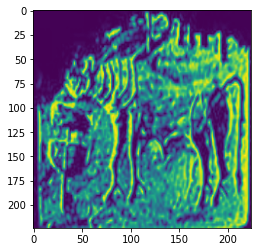

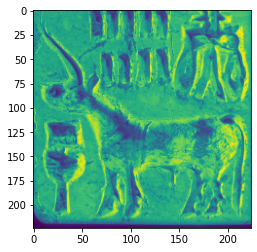

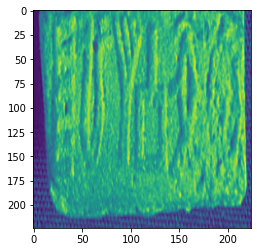

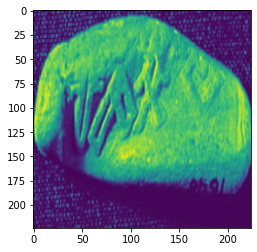

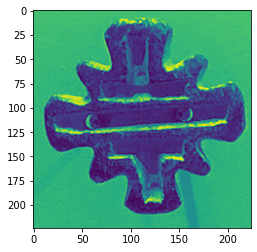

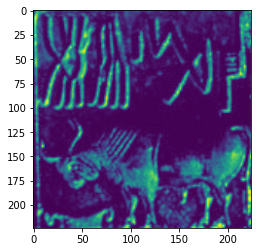

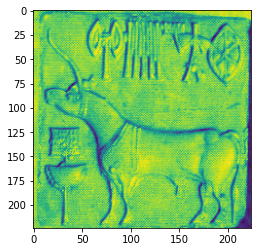

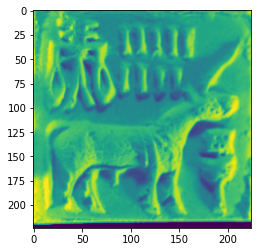

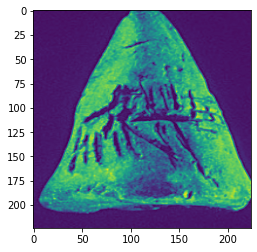

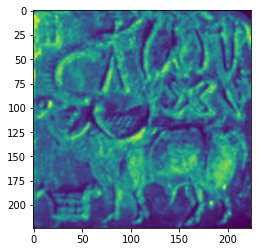

In [82]:
labels = kmeans.labels_
count = 0
for i in range(len(data)):
    if(labels[i]==0):
        plt.imshow(data[i])
        count+=1
        plt.show()
    if(count==10):
        break

In [68]:
# labels = kmeans.labels_
# count = 0
# for i in range(len(data)):
#     if(labels[i]==2):
#         plt.imshow(data[i])
#         count+=1
#         plt.show()
#     if(count==10):
#         break